In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 读数据

In [72]:
from data_utils import data_reader

data_path = './data'
data_file = "治疗过程记录.xlsx"
output_path = './outputs'
data = data_reader(data_path,data_file,fill_na="")

data

,mr_bah,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,...,specimen_code,item_group_name,item_code,item_name,result_quantitative,result_qualitative,result_unit,reference_range,reference_range_alert,report_date
1,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0031,葡萄糖[Glu],0.59,0.59,mmol/L,2.5-4.5,L,20220706
2,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0087,微量蛋白[MTP],2.02,2.02,g/L,0.15-0.45,H,20220706
3,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0095,蛋白定性,250,阳性(+),,,,20220706
4,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液常规(检),C0093,透明度,244,混浊,,,,20220706
5,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0093,透明度,244,混浊,,,,20220706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液常规(检),C0093,透明度,244,混浊,,,,20231128
8369,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液细胞学检查(检),C0100,多个核细胞百分比,70,70,%,,,20231128
8370,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0031,葡萄糖[Glu],2.70,2.70,mmol/L,2.5-4.5,,20231128
8371,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0087,微量蛋白[MTP],1.88,1.88,g/L,0.15-0.45,H,20231128


In [73]:
from data_utils import Infector_chooser

rows_with_infection, rows_without_infection = Infector_chooser(data)

## 病症手术分析

In [74]:
from data_utils import patient_splitter
indicators = ['mr_bah', 'mr_xb', 'mr_nn', 'mr_sjzyts', 'mr_cyzyzdmc', 'mr_cyqtzdmc1',
       'mr_cyqtzdmc2', 'mr_cyqtzdmc3', 'mr_cyqtzdmc4', 'mr_cyqtzdmc5',
       'mr_cyqtzdmc6', 'mr_cyqtzdmc7', 'mr_cyqtzdmc8', 'mr_cyqtzdmc9',
       'mr_cyqtzdmc10', 'mr_ssmc1', 'mr_ssmzfs1', 'mr_sscxsj1', 'mr_ssmc2',
       'mr_ssmzfs2', 'mr_ssmc3', 'mr_ssmzfs3', 'mr_ssmc4', 'mr_ssmzfs4',
       'mr_sscxsj4']

Patients = patient_splitter(data,indicators=indicators)

In [75]:
from collections import Counter
def frequency_count(df):
    all_text = ' '.join(df.astype(str).values.flatten())

    # 使用Counter统计每个词的频率
    df_count = Counter(all_text.split())
    count_df = pd.DataFrame(df_count.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    
    return count_df

### 病症分析

In [76]:
relavant_illness = ['mr_cyzyzdmc', 'mr_cyqtzdmc1',
       'mr_cyqtzdmc2', 'mr_cyqtzdmc3', 'mr_cyqtzdmc4', 'mr_cyqtzdmc5',
       'mr_cyqtzdmc6', 'mr_cyqtzdmc7', 'mr_cyqtzdmc8', 'mr_cyqtzdmc9',
       'mr_cyqtzdmc10']

illness_df = Patients[relavant_illness]

illness_freq = frequency_count(illness_df)
categories = illness_freq['word']
num_categories = len(categories)

In [77]:
illness_freq.describe()

,frequency
count,329.000000
mean,2.793313
std,4.685195
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,40.000000


### 查看症状频数的分布

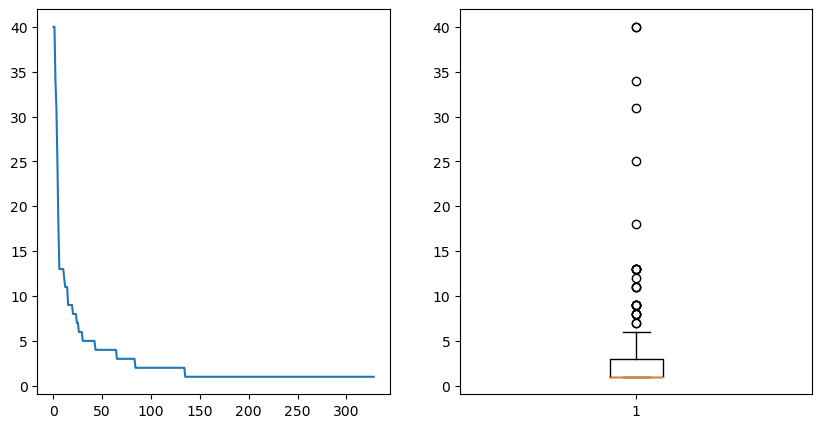

In [78]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(illness_freq['frequency'].to_numpy())
plt.subplot(1,2,2)
plt.boxplot(illness_freq['frequency'].to_numpy())
plt.show()

### onehot编码病症标签

In [79]:
from data_utils import one_hot

one_hot_matrix = one_hot(illness_df,categories)
one_hot_df = pd.DataFrame(one_hot_matrix)
col_data = one_hot_df["颅内感染"]
one_hot_df.drop("颅内感染", axis=1, inplace=True)
one_hot_df["颅内感染"] = col_data
one_hot_df

word,胸腔积液,肺部感染,脑水肿,高血压病3级（极高危）,面肌痉挛,电解质紊乱,三叉神经痛,颅内动脉瘤破裂伴蛛网膜下腔出血,肺气肿,低蛋白血症,...,椎间盘突出,共济失调,肺良性肿瘤,大脑动脉狭窄脑梗死,癫痫大发作状态,弥漫性颅内压增高,冠状动脉支架植入后状态,急性前间壁心肌梗死,肺原位癌,颅内感染
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 分离频数过小数据样本

In [81]:
freq_list = illness_freq['frequency'].to_numpy()
sample_percent = np.cumsum(freq_list) / np.sum(freq_list) 
sample_to_take = sample_percent < 0.75

categories = illness_freq[sample_to_take]['word']
num_categories = len(categories)
categories

37            胸腔积液
4             肺部感染
3             颅内感染
41             脑水肿
70     高血压病3级（极高危）
          ...     
207          蛛网膜粘连
197           脑脊液漏
96           高血压3级
47           甲状腺结节
303     高血压病3级（高危）
Name: word, Length: 117, dtype: object

### 计算协同矩阵与相关性矩阵

In [82]:
category_matrix = one_hot_matrix[categories]

co_occurrence_matrix = category_matrix.T.dot(category_matrix)
correlation_matrix = co_occurrence_matrix.corr()
correlation_matrix

word,胸腔积液,肺部感染,颅内感染,脑水肿,高血压病3级（极高危）,面肌痉挛,电解质紊乱,三叉神经痛,颅内动脉瘤破裂伴蛛网膜下腔出血,肺气肿,...,创伤性脑脊液漏,创伤性颅内血肿,基底动脉蛛网膜下腔出血,颅内积气[气颅症],肝钙化灶,蛛网膜粘连,脑脊液漏,高血压3级,甲状腺结节,高血压病3级（高危）
word,,,,,,,,,,,,,,,,,,,,,
胸腔积液,1.000000,0.766127,0.322113,0.704452,0.452743,-0.003008,0.462027,0.020842,0.182449,0.452340,...,0.080441,0.265972,0.573436,0.075814,0.117687,-0.027929,0.031867,-0.071931,0.031867,-0.044870
肺部感染,0.766127,1.000000,0.389109,0.526319,0.603557,0.014465,0.615360,0.100130,0.276189,0.330983,...,0.257254,0.307127,0.455884,0.053067,0.070521,-0.000305,0.094626,-0.065393,0.202483,-0.008029
颅内感染,0.322113,0.389109,1.000000,0.290924,0.187421,0.486594,0.270567,0.429197,0.017164,0.108318,...,0.314256,0.294930,0.076507,0.407035,-0.012991,0.365191,0.311607,-0.016200,-0.025283,-0.028150
脑水肿,0.704452,0.526319,0.290924,1.000000,0.452636,0.064799,0.351916,0.019038,0.221154,0.369698,...,0.022833,0.078626,0.242565,0.291292,0.339226,-0.022499,0.064822,-0.066916,-0.007715,-0.038557
高血压病3级（极高危）,0.452743,0.603557,0.187421,0.452636,1.000000,0.059167,0.397795,0.178424,0.350478,0.209891,...,0.024554,0.035546,0.399970,0.043752,0.346226,0.007120,0.248905,-0.018227,0.053732,0.031387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蛛网膜粘连,-0.027929,-0.000305,0.365191,-0.022499,0.007120,0.133389,0.017278,0.791983,-0.052121,-0.039470,...,0.035785,0.035807,-0.047521,0.090449,-0.048415,1.000000,0.057868,0.231334,-0.043185,-0.031189
脑脊液漏,0.031867,0.094626,0.311607,0.064822,0.248905,0.107667,0.100389,0.110080,-0.009256,-0.030665,...,0.063547,-0.015558,-0.008439,0.052616,-0.002149,0.057868,1.000000,0.065845,-0.076687,-0.055385
高血压3级,-0.071931,-0.065393,-0.016200,-0.066916,-0.018227,-0.013798,-0.047337,0.365274,-0.059306,-0.070174,...,-0.050898,-0.060681,-0.054071,-0.035489,-0.055089,0.231334,0.065845,1.000000,0.065845,-0.035489


In [83]:
corr_path = os.path.join(output_path,"corr.csv")
occur_path = os.path.join(output_path,"occur.csv")
correlation_matrix.to_csv(corr_path)
co_occurrence_matrix.to_csv(occur_path)

### 高相关性结果

In [84]:
corr_value = 0.4 #相关性阈值
corr_selected = (correlation_matrix.loc['颅内感染'] > corr_value).to_numpy()
high_corr_indicators = categories[corr_selected]
high_corr_indicators

3                颅内感染
76               面肌痉挛
80              三叉神经痛
36              低蛋白血症
21               脑内出血
19                脑积水
252           手术后颅内积气
186              低钠血症
1            多发性大脑挫裂伤
61          手术后切口愈合不良
71             小脑恶性肿瘤
284            外展神经损伤
28        脑室腹腔分流管置入感染
26     脑实质出血继发蛛网膜下腔出血
261         颅内积气[气颅症]
Name: word, dtype: object

有几种可能
- 颅内感染与其他疾病并发
- 颅内感染导致了其他疾病
- 其他疾病导致了颅内感染

### 条件概率：

$P(发生其他疾病|发生颅内感染)$

In [85]:
co_occurrence_matrix_np = co_occurrence_matrix.to_numpy()
all_freq = np.diagonal(co_occurrence_matrix_np)
infection = co_occurrence_matrix.loc['颅内感染']
condition_prob =  infection / all_freq
condition_prob = pd.DataFrame(condition_prob)

### 概率可视化

D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 33016 (\N{CJK UNIFIED IDEOGRAPH-80F8}) missing from current font.
  fig.canvas.draw()
D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 33108 (\N{CJK UNIFIED IDEOGRAPH-8154}) missing from current font.
  fig.canvas.draw()
D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  fig.canvas.draw()
D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 28082 (\N{CJK UNIFIED IDEOGRAPH-6DB2}) missing from current font.
  fig.canvas.draw()
D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 39045 (\N{CJK UNIFIED IDEOGRAPH-9885}) missing from current font.
  fig.canvas.draw()
D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.
  fig.canvas.draw()
D:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: 

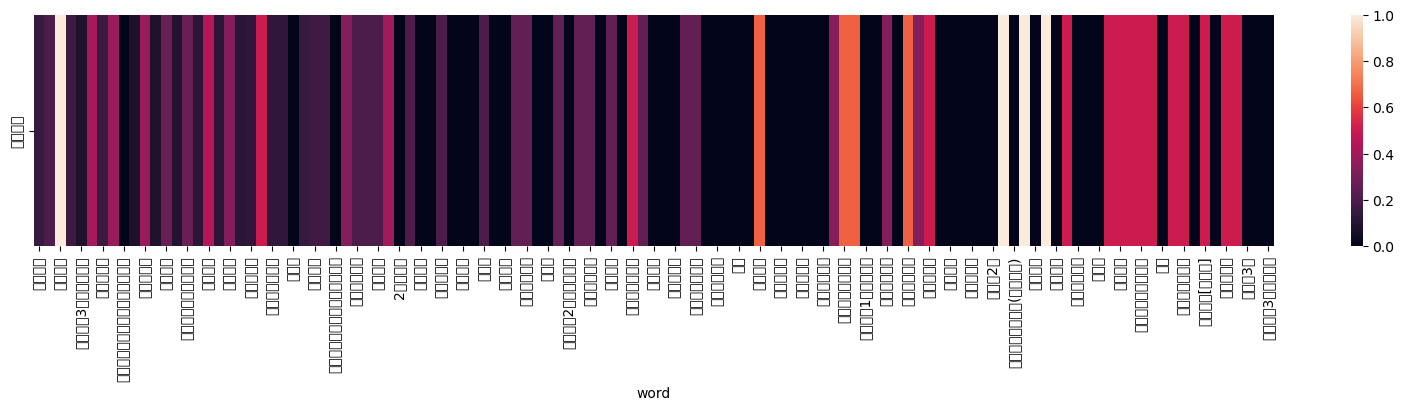

In [86]:
plt.figure(figsize=(20,3))
sns.heatmap(condition_prob.T)
plt.show()

### 高概率值

In [87]:
prob_value = 0.5 #概率阈值
prob_selected = (condition_prob > prob_value).to_numpy()
prob_selected = np.squeeze(prob_selected,axis=1)
high_prob_indicators = categories[prob_selected]
high_prob_indicators

3                颅内感染
186              低钠血症
1            多发性大脑挫裂伤
61          手术后切口愈合不良
71             小脑恶性肿瘤
284            外展神经损伤
28        脑室腹腔分流管置入感染
26     脑实质出血继发蛛网膜下腔出血
Name: word, dtype: object

In [88]:
# 共有的结果
np.intersect1d(high_prob_indicators,high_corr_indicators)

array(['低钠血症', '外展神经损伤', '多发性大脑挫裂伤', '小脑恶性肿瘤', '手术后切口愈合不良',
       '脑实质出血继发蛛网膜下腔出血', '脑室腹腔分流管置入感染', '颅内感染'], dtype=object)

In [89]:
columns_to_keep = ['低钠血症', '外展神经损伤', '多发性大脑挫裂伤', '小脑恶性肿瘤', '手术后切口愈合不良',
       '脑实质出血继发蛛网膜下腔出血', '脑室腹腔分流管置入感染', '颅内感染']

# 使用 drop 方法删除不需要的列
one_hot_df.drop(one_hot_df.columns.difference(columns_to_keep), axis=1, inplace=True)

In [90]:
from pgmpy.estimators import HillClimbSearch, BicScore

# 使用HillClimbSearch算法和BIC评分来学习贝叶斯网络结构
hc = HillClimbSearch(one_hot_df)
best_model = hc.estimate(scoring_method=BicScore(one_hot_df))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork

# 使用最大似然估计（MLE）学习贝叶斯网络的参数
model = BayesianNetwork(best_model.edges())
model.fit(df, estimator=MaximumLikelihoodEstimator)

# 使用VariableElimination进行推断
inference = VariableElimination(model)


# 计算每个因素对A病的影响
causes = []
for factor in one_hot_df.columns[:-1]:  # 不包括A病本身
    if factor in model.nodes():
        prob_given_factor = inference.query(variables=['颅内感染'], evidence={factor: 1})
        causes.append((factor, prob_given_factor.values[1]))  # 取A病为1的概率

# 按照对A病的影响排序
sorted_causes = sorted(causes, key=lambda x: x[1], reverse=True)
sorted_causes